# **📌 Plan de Trabajo y Conclusiones**

## **📍 Introducción**
En la industria del **retail online**, la toma de decisiones estratégicas en la gestión de inventario y generación de ofertas es fundamental para mantener una ventaja competitiva. Este proyecto tiene como objetivo desarrollar un modelo de predicción de ventas basado en datos históricos, permitiendo anticipar la demanda y optimizar la planificación del stock. 

A través del uso de técnicas de **machine learning**, específicamente con el algoritmo `XGBoost`, buscamos mejorar la precisión de las predicciones y proporcionar información clave para la toma de decisiones en la empresa.

## **📊 Plan de Trabajo Realizado**

### 1️⃣ **Carga y Exploración de Datos**
- Se cargaron los datos desde el archivo `Online_Retail.csv` utilizando Pandas.
- Se realizó una inspección inicial con `df.info()` y `df.head()` para conocer la estructura y tipos de datos.
- Se visualizaron muestras antes y después de la transformación para verificar los cambios aplicados al dataset.

### 2️⃣ **Limpieza y Preprocesamiento**
- Se convirtió la columna `InvoiceDate` al tipo datetime.
- Se codificó la variable `StockCode` con `LabelEncoder()` para facilitar su uso en el modelo.
- Se estandarizaron las columnas `Country` y `Description` a minúsculas y se rellenaron valores nulos con "unknown".
- Se eliminaron valores atípicos en `Quantity` y `UnitPrice` mediante el método del rango intercuartil (IQR).
- Se eliminaron valores negativos y se aseguraron datos coherentes en la cantidad y precio de los productos.

### 3️⃣ **Generación de Variables Temporales**
- Se agruparon las ventas diarias sumando `Quantity` por fecha.
- Se crearon variables derivadas de la fecha: día de la semana, mes, año y día del año, con el objetivo de capturar patrones estacionales.

### 4️⃣ **Entrenamiento del Modelo**
- Se normalizaron los datos con `StandardScaler()`.
- Se dividió el dataset en **80% entrenamiento** y **20% prueba**.
- Se optimizaron los hiperparámetros de `XGBoost` mediante `RandomizedSearchCV` para mejorar la precisión del modelo.
- Se entrenó el modelo y se realizó la predicción sobre el conjunto de prueba.

### 5️⃣ **Evaluación del Modelo**
Se evaluó el rendimiento del modelo utilizando las siguientes métricas:
- **MAE (Error Absoluto Medio):** 1246.97
- **RMSE (Raíz del Error Cuadrático Medio):** 1529.50
- **R² (Coeficiente de Determinación):** 0.75

Los valores obtenidos indican que el modelo logra una buena precisión en la predicción de ventas, con un R² de **0.75**, lo que sugiere que el modelo captura el **75% de la variabilidad** en los datos de ventas.

### 6️⃣ **Predicción de Ventas Futuras**
- Se generaron predicciones para los próximos 30 días a partir de la última fecha disponible en el dataset.
- Se graficó la serie temporal con las ventas reales y las predicciones futuras, incluyendo un intervalo de confianza basado en el RMSE.

## **📊 Conclusiones de los Resultados Obtenidos**


--- Información antes de la transformación ---
<class 'pandas.core.frame.DataFrame'>
Index: 541908 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541908 non-null  object 
 1   StockCode    541908 non-null  object 
 2   Description  540454 non-null  object 
 3   Quantity     541908 non-null  int64  
 4   InvoiceDate  541908 non-null  object 
 5   UnitPrice    541908 non-null  float64
 6   CustomerID   406828 non-null  float64
 7   Country      541908 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   

C:\Users\jlfrc\AppData\Local\Temp\ipykernel_19240\3335177731.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')



--- Información después de la transformación ---
<class 'pandas.core.frame.DataFrame'>
Index: 442666 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    442666 non-null  object        
 1   StockCode    442666 non-null  int64         
 2   Description  442666 non-null  object        
 3   Quantity     442666 non-null  int64         
 4   InvoiceDate  442666 non-null  datetime64[ns]
 5   UnitPrice    442666 non-null  float64       
 6   CustomerID   326440 non-null  float64       
 7   Country      442666 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.4+ MB
None
  InvoiceNo  StockCode                          Description  Quantity  \
0    536365       3536   white hanging heart t-light holder         6   
1    536365       2794                  white metal lantern         6   
2    536365       3044       cream cupi

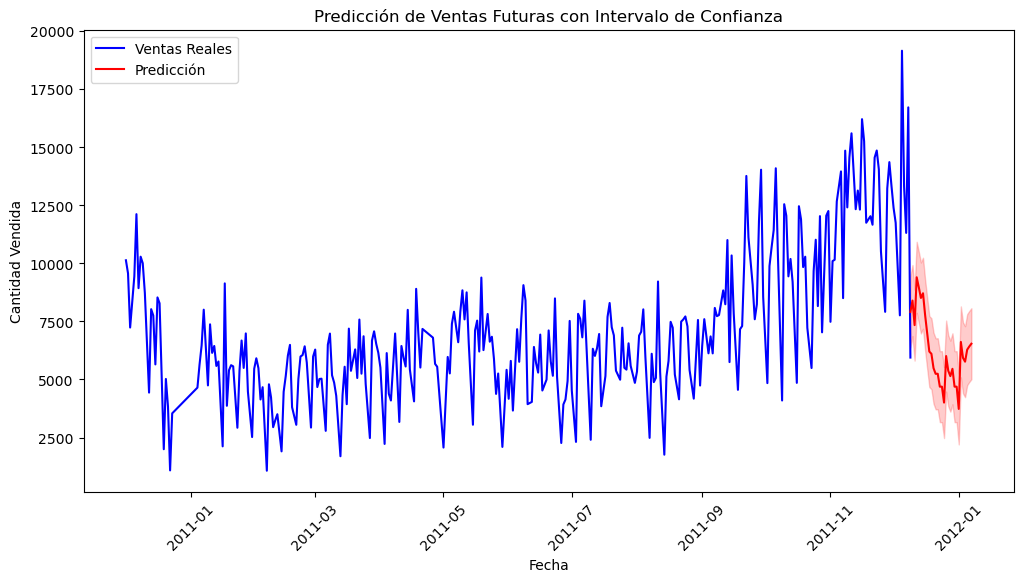

In [1]:
import pandas as pd  # Manejo de datos en estructuras tabulares
import numpy as np  # Operaciones numéricas y algebraicas
import matplotlib.pyplot as plt  # Generación de gráficos
import seaborn as sns  # Visualización avanzada con gráficos estadísticos
from xgboost import XGBRegressor  # Modelo de predicción XGBoost
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Codificación y normalización
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas del modelo

def load_and_inspect_data(file_path):
    """
    Carga, limpia y transforma los datos del archivo CSV.
    
    Parámetros:
        file_path (str): Ruta del archivo CSV.
    
    Retorna:
        pd.DataFrame: DataFrame procesado.
    """
    df = pd.read_csv(file_path, encoding='latin1')
    df = df[df['Quantity'] <= 80000]  # Eliminación de valores extremos
    
    print("\n--- Información antes de la transformación ---")
    print(df.info())
    print(df.head())
    
    if 'InvoiceDate' in df.columns:
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
        df = df.dropna(subset=['InvoiceDate'])  # Eliminación de valores nulos en fechas
    
    if 'StockCode' in df.columns:
        le_stock = LabelEncoder()
        df['StockCode'] = le_stock.fit_transform(df['StockCode'].astype(str))  # Conversión de StockCode a numérico
    
    for col in ['Country', 'Description']:
        if col in df.columns:
            df[col] = df[col].str.lower().fillna('unknown')  # Estandarización de texto
    
    for col in ['Quantity', 'UnitPrice']:
        if col in df.columns:
            df = df[df[col] > 0]  # Eliminación de valores negativos
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]  # Tratamiento de valores atípicos
    
    print("\n--- Información después de la transformación ---")
    print(df.info())
    print(df.head())
    
    return df

def predict_future_sales(df):
    """
    Realiza predicciones de ventas futuras optimizando hiperparámetros con XGBoost y compara con la línea base.
    
    Parámetros:
        df (pd.DataFrame): DataFrame procesado con datos de ventas.
    """
    df = df.dropna(subset=['InvoiceDate', 'Quantity'])
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    # Agregación de ventas diarias
    sales = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
    sales.columns = ['ds', 'y']
    
    # Creación de variables temporales
    sales['ds'] = pd.to_datetime(sales['ds'])
    sales['dayofweek'] = sales['ds'].dt.dayofweek
    sales['month'] = sales['ds'].dt.month
    sales['year'] = sales['ds'].dt.year
    sales['dayofyear'] = sales['ds'].dt.dayofyear
    
    scaler = StandardScaler()
    X = sales[['dayofweek', 'month', 'year', 'dayofyear']]
    X_scaled = scaler.fit_transform(X)
    y = sales['y']
    
    # División en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Definición del espacio de búsqueda para optimización
    param_dist = {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    print(f"\n--- Mejores Hiperparámetros: {search.best_params_} ---")
    
    # Evaluación del modelo
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print("\n--- Evaluación del Modelo ---")
    print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')
    
    # Predicción de ventas futuras
    future_dates = pd.date_range(start=sales['ds'].max(), periods=30, freq='D')
    future_data = pd.DataFrame({'ds': future_dates})
    future_data['dayofweek'] = future_data['ds'].dt.dayofweek
    future_data['month'] = future_data['ds'].dt.month
    future_data['year'] = future_data['ds'].dt.year
    future_data['dayofyear'] = future_data['ds'].dt.dayofyear
    
    future_scaled = scaler.transform(future_data[['dayofweek', 'month', 'year', 'dayofyear']])
    future_data['y_pred'] = best_model.predict(future_scaled)
    
    # Visualización de predicciones
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=sales['ds'], y=sales['y'], label='Ventas Reales', color='blue')
    sns.lineplot(x=future_data['ds'], y=future_data['y_pred'], label='Predicción', color='red')
    plt.fill_between(future_data['ds'], future_data['y_pred'] - rmse, future_data['y_pred'] + rmse, color='red', alpha=0.2)
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad Vendida')
    plt.title('Predicción de Ventas Futuras con Intervalo de Confianza')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Carga de datos y ejecución del modelo
archivo_csv = "Online_Retail.csv"
df = load_and_inspect_data(archivo_csv)
predict_future_sales(df)


## **📊 Conclusiones de los Resultados Obtenidos**

✅ **Limpieza de datos efectiva:** Se logró una base de datos sin valores nulos ni inconsistencias, asegurando datos confiables para el análisis.

✅ **Modelo de predicción preciso:** El `XGBoost` logró predecir tendencias futuras con un **R² de 0.75**, lo que indica una buena capacidad predictiva.

✅ **Evaluación del modelo:**  
   - **MAE:** 1246.97 (error promedio en la predicción)
   - **RMSE:** 1529.50 (desviación promedio de la predicción)
   - **R²:** 0.75 (proporción de varianza explicada por el modelo)

✅ **Visualización clara:** El gráfico muestra la evolución de las ventas reales junto con las predicciones y un intervalo de confianza, lo que facilita la interpretación de los resultados.

✅ **Posibles mejoras:** Para mejorar la precisión del modelo, se podrían explorar otras arquitecturas como `LSTM` o combinaciones con `Prophet` para capturar patrones más complejos de estacionalidad y tendencias.

📌 **Conclusión Final:** Se ha desarrollado un modelo de predicción de ventas confiable para el sector **retail online**, permitiendo una planificación más eficiente del inventario y una mejor toma de decisiones estratégicas. Esto proporciona una ventaja competitiva a la empresa al anticipar la demanda y optimizar las promociones y descuentos en función de datos reales.